# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
  * [3.5 Correlations in the Data](#3.5_Correlations_in_the_Data)
  * [3.6 Plot the Data by Column](#3.6_Plot_the_Data_by_Column)
      * [3.6.1 loan_amnt, annual_inc, int_rate, installment](#3.6.1_loan_amnt,_annual_inc,_int_rate,_installment)
      * [3.6.2 loan_stat](#3.6.2_loan_stat)
      * [3.6.3 verification_status, emp_length, addr_state, purpose](#3.6.3_verification_status,_emp_length,_addr_state,_purpose)
      * [3.6.4 grade, sub_grade, term(months), home_ownership](#3.6.4_grade,_sub_grade,_term(months),_home_ownership)
      * [3.6.5 dti, tot_coll_amt](#3.6.5_dti,_tot_coll_amt)
      * [3.6.6 acc_now_delinq, delinq_2yrs](#3.6.6_acc_now_delinq,_delinq_2yrs)
      * [3.6.7 inq_last_6mths, pub_rec](#3.6.7_inq_last_6mths,_pub_rec)
      * [3.6.8 collections_12_mths_ex_med](#3.6.8_collections_12_mths_ex_med)
      * [3.6.9 open_acc, total_acc](#3.6.9_open_acc,_total_acc)
      * [3.6.10 log_revol_bal](#3.6.10_log_revol_bal)
      * [3.6.11 revol_util](#3.6.11_revol_util)
      * [3.6.12 last_credit_pull_d, earliest_cr_line](#3.6.12_last_credit_pull_d,_earliest_cr_line)
      * [3.6.13 sub_grade vs. int_rate](#3.6.13_sub_grade_vs._int_rate)
  * [3.7 Summary](#3.7_Summary)

## 3.2 Introduction<a id='3.2_Introduction'></a>

In this notebook, I am going to start looking at the relationships between the columns in the data while keeping in mind that the final goal is to be able to predict whether a loan will default.

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

In [2]:
lc = pd.read_csv('../data/cleaned_data/LC_cleaned.csv', index_col='id')
lc.head()

,loan_amnt,term(months),int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,defaults,earliest_cr_line_year,last_credit_pull_d_year,log_revol_bal
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,...,0.0,83.7,9.0,0.0,0.0,0.0,0,1985,2016,4.135101
1077430,2500.0,60,15.27,59.83,C,C4,0.0,RENT,30000.0,Source Verified,...,0.0,9.4,4.0,0.0,0.0,0.0,1,1999,2013,3.227372
1077175,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,...,0.0,98.5,10.0,0.0,0.0,0.0,0,2001,2016,3.470851
1076863,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,...,0.0,21.0,37.0,0.0,0.0,0.0,0,1996,2015,3.748110
1075269,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,...,0.0,28.3,12.0,0.0,0.0,0.0,0,2004,2015,3.901131


In [3]:
lc.columns

Index(['loan_amnt', 'term(months)', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'defaults', 'earliest_cr_line_year',
       'last_credit_pull_d_year', 'log_revol_bal'],
      dtype='object')

In [4]:
# setting some formatting for graphs
plt.style.use('bmh')
sns.set_style('whitegrid')

## 3.5 Correlations in the Data<a id='3.5_Correlations_in_the_Data'></a>

Now I am going to look into which columns correlate with eachother. 

In [5]:
# calculate the correlations
correlations = lc.corr()

<AxesSubplot:>

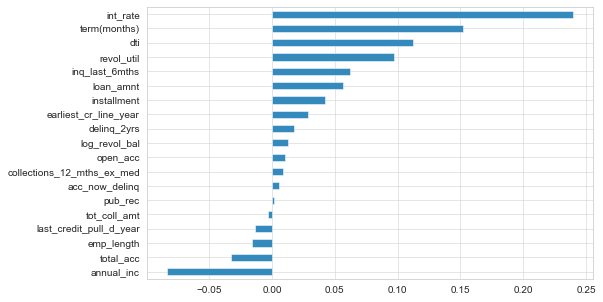

In [6]:
# which columns are most correlated with defaults?
plt.figure(figsize=(8, 5))
lc.corr()['defaults'].drop('defaults').sort_values().plot(kind='barh')

 The highest correlations to defaults are int_rate, term(months), and dti. 

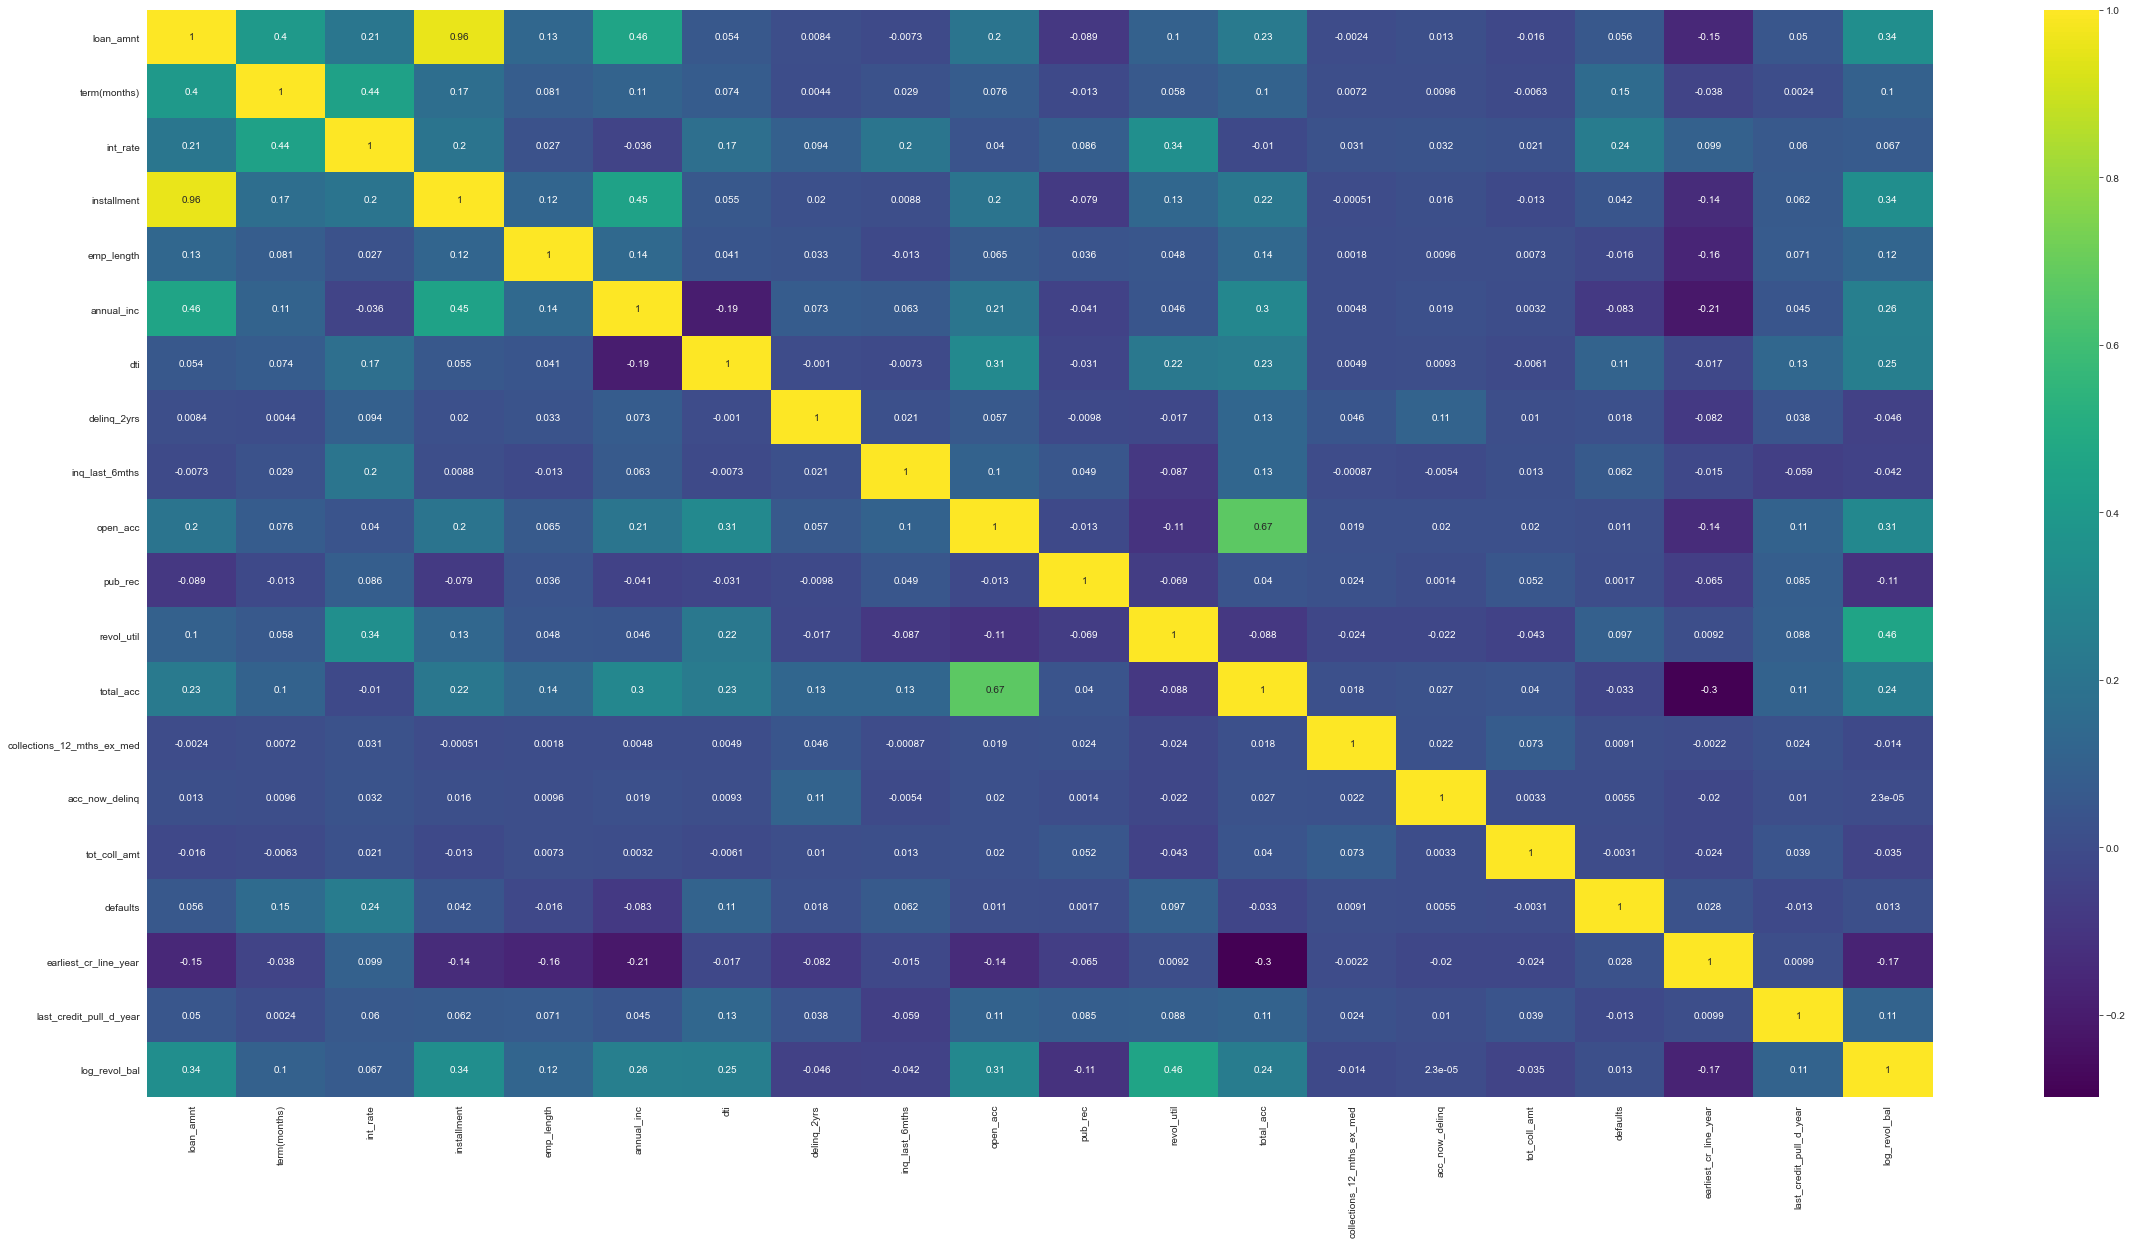

In [7]:
# create a heatmap of the continuous variables 
plt.figure(figsize=(40,20))
sns.heatmap(correlations, annot=True, cmap='viridis')
plt.show()

Looking at the heatmap, can we get rid of the installment column since it almost perfectly correlated with loan_amnt?

It looks like open_acc and total_acc are very highly correlated. Can open_acc be dropped since it is less correlated with defaults?

## 3.6 Plot the Data by Column<a id='3.6_Plot_the_Data_by_Column'></a>

### 3.6.1 loan_amnt, annual_inc, int_rate, installment<a id='3.6.1_loan_amnt,_annual_inc,_int_rate,_installment'></a>

Text(0.5, 0, 'installment')

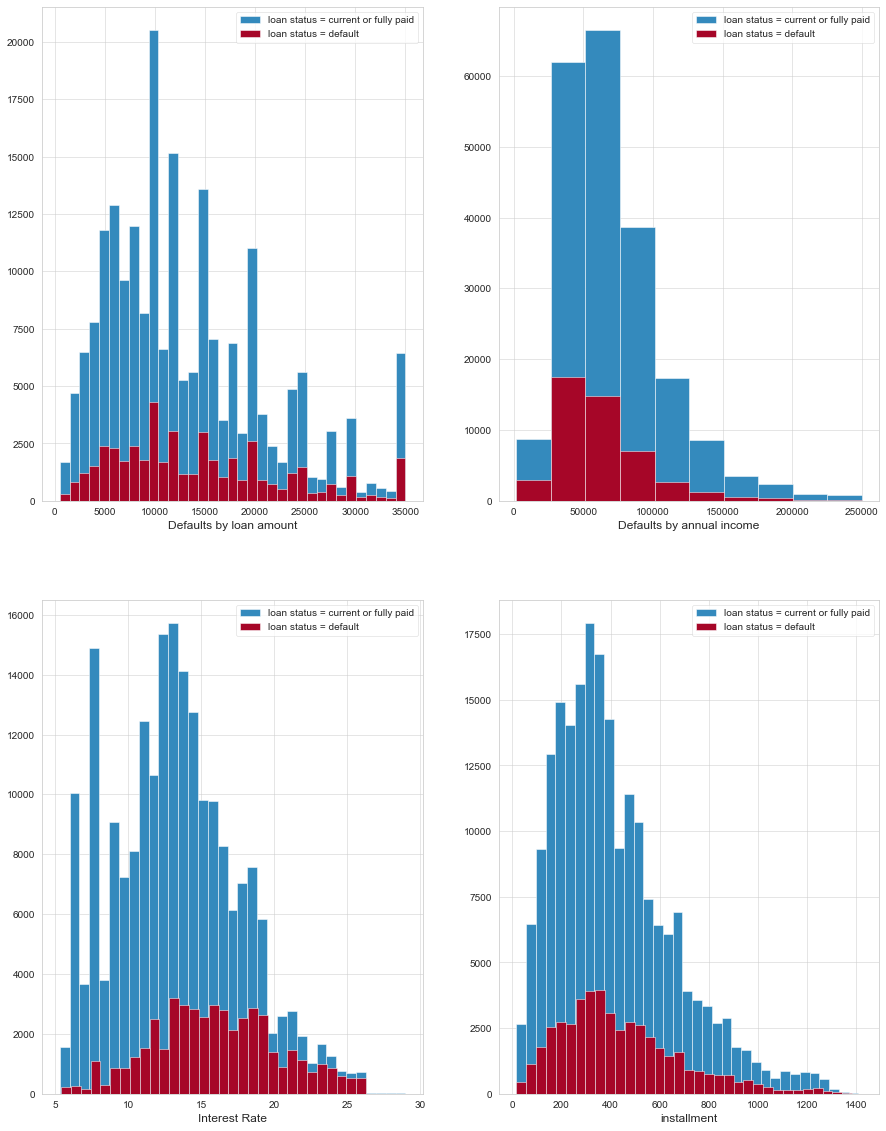

In [8]:
plt.figure(figsize=(15, 20))

plt.subplot(2, 2, 1)
lc[lc['defaults'] == 0]['loan_amnt'].hist(bins=35, label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['loan_amnt'].hist(bins=35, label='loan status = default')
plt.legend()
plt.xlabel('Defaults by loan amount')

plt.subplot(2, 2, 2)
lc[lc['defaults'] == 0]['annual_inc'].hist(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['annual_inc'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Defaults by annual income')
plt.ticklabel_format(useOffset=False, style='plain')

plt.subplot(2, 2, 3)
lc[lc['defaults'] == 0]["int_rate"].hist(bins=35, label='loan status = current or fully paid')
lc[lc['defaults'] == 1]["int_rate"].hist(bins=35, label='loan status = default')
plt.legend()
plt.xlabel("Interest Rate")

plt.subplot(2, 2, 4)
lc[lc['defaults'] == 0]["installment"].hist(bins=35, label='loan status = current or fully paid')
lc[lc['defaults'] == 1]["installment"].hist(bins=35, label='loan status = default')
plt.legend()
plt.xlabel("installment")

Text(0.5, 1.0, 'Relationship between loan amount and installment')

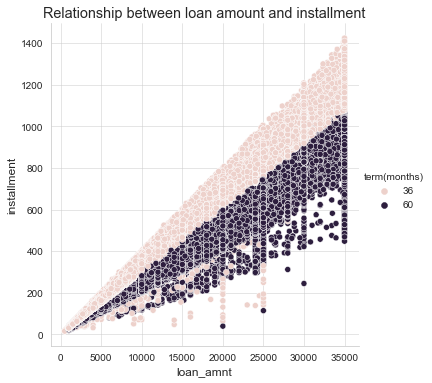

In [9]:
sns.relplot(x='loan_amnt', y='installment', hue='term(months)', data=lc)
plt.title('Relationship between loan amount and installment')

Looking at the above graph, there is a very clear relationship between loan_amnt, installment, and the loan term. 

Looking at the graphs above, it is hard to tell whether loan amount or annual income impacts whether a loan will default. Since the data is not normally distributed, I will use the Kruskal-Wallis H-test which tests the null hypothesis that the population median of all of the groups are equal.

In [10]:
# looking at Kruskal-Wallis statistic
# null-hypothesis: loan_amnt does not impact on the default rate

sample_default = lc[lc['defaults']==1]['loan_amnt']
sample_nondefault = lc[lc['defaults']==0]['loan_amnt']

stats.kruskal(sample_default, sample_nondefault)

KruskalResult(statistic=819.981389440873, pvalue=2.4423825062579897e-180)

In [11]:
# looking at Kruskal-Wallis statistic
# null-hypothesis: annual_inc does not impact on the default rate

annual_inc_default = lc[lc['defaults']==1]['annual_inc']
annual_inc_nondefault = lc[lc['defaults']==0]['annual_inc']

stats.kruskal(annual_inc_default, annual_inc_nondefault)

KruskalResult(statistic=2212.1968375116576, pvalue=0.0)

Given the two p-values above, I reject the null-hypotheses that annual_inc and loan_amnt does not impact whether or not a loan will default. 

### 3.6.2 loan_stat<a id='3.6.2_loan_stat'></a>

Text(0.5, 1.0, 'Loan Status')

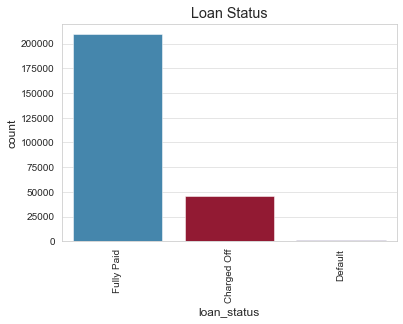

In [12]:
loan_stat = sns.countplot(x='loan_status', data=lc)
loan_stat.set_xticklabels(loan_stat.get_xticklabels(), rotation=90)
plt.title('Loan Status')

The loan_status column was used to create the defaults column ('default' and 'charged off' were both set to default). I do not feel the need to keep this column any longer. I will now drop loan_status.

In [13]:
lc.drop(['loan_status'], axis=1, inplace=True)
lc.shape

(256640, 26)

### 3.6.3 verification_status, emp_length, addr_state, purpose<a id='3.6.3_verification_status,_emp_length,_addr_state,_purpose'></a>

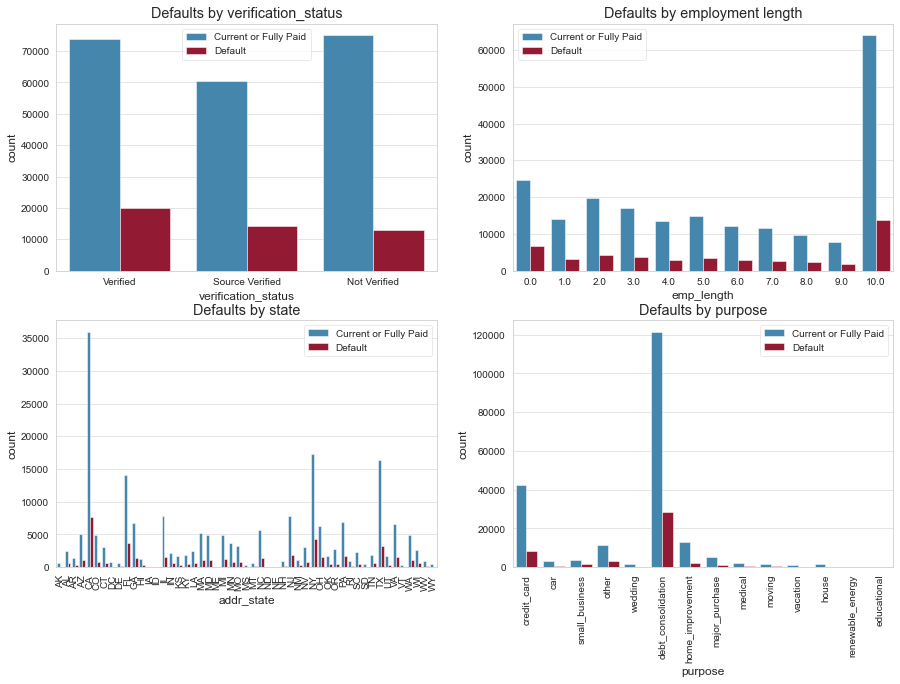

In [14]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='verification_status', data=lc, hue='defaults')
plt.title('Defaults by verification_status')
plt.legend(['Current or Fully Paid', 'Default'])

plt.subplot(2, 2, 2)
length = sorted(lc.emp_length.unique().tolist())
sns.countplot(x='emp_length', data=lc, hue='defaults', order=length)
plt.title('Defaults by employment length')
plt.legend(['Current or Fully Paid', 'Default'])

plt.subplot(2, 2, 3)
state_name = sorted(lc.addr_state.unique().tolist())
state = sns.countplot(x='addr_state', data=lc, hue='defaults', order=state_name)
state.set_xticklabels(state.get_xticklabels(), rotation=90)
plt.title('Defaults by state')
plt.legend(['Current or Fully Paid', 'Default'], loc='upper right')

plt.subplot(2, 2, 4) 
purpose = sns.countplot(x='purpose', data=lc, hue='defaults')
purpose.set_xticklabels(purpose.get_xticklabels(), rotation=90)
plt.title('Defaults by purpose')
plt.legend(['Current or Fully Paid', 'Default'], loc='upper right')

I am going to combine some of the 'purpose' categories since they are imbalanced.

In [15]:
lc['purpose'].value_counts()

debt_consolidation    150127
credit_card            50592
home_improvement       15171
other                  14715
major_purchase          6397
small_business          4917
car                     3712
medical                 2924
moving                  2080
wedding                 2010
house                   1701
vacation                1612
educational              412
renewable_energy         270
Name: purpose, dtype: int64

In [16]:
other = ['educational', 'renewable_energy', 'wedding', 'vacation']
housing = ['house', 'moving', 'home_improvement']

for i in other:
    lc['purpose'] = lc['purpose'].str.replace(i, 'other')

for j in housing:    
    lc['purpose'] = lc['purpose'].str.replace(j, 'housing')
    
lc.purpose.value_counts()

debt_consolidation    150127
credit_card            50592
other                  19019
housing                18952
major_purchase          6397
small_business          4917
car                     3712
medical                 2924
Name: purpose, dtype: int64

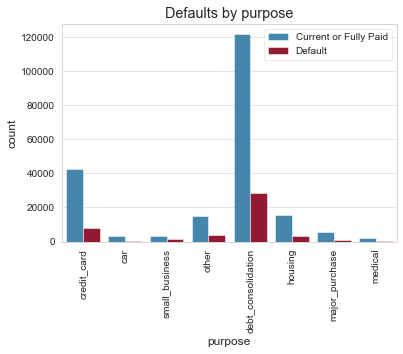

In [17]:
purpose = sns.countplot(x='purpose', data=lc, hue='defaults')
purpose.set_xticklabels(purpose.get_xticklabels(), rotation=90)
plt.title('Defaults by purpose')
plt.legend(['Current or Fully Paid', 'Default'], loc='upper right')

Here I am going to take a closer look at the percentage of defaults per unique value in each of these columns. I will start by writing a function to do these calculations. 

In [18]:
# here I am defining a function that calculates the percentage of defaults for each unique value in a column
def percent_defaults(col):
    values = list(lc[col].unique())
    value_count = dict(lc[col].value_counts())
    default_percent = list()
    for i in range(len(values)):
        key = values[i]
        default_percent.append(lc[lc[col] == key]['defaults'].sum()/value_count[key]*100)
    return dict(zip(values, default_percent))

In [19]:
# define a function that returns the range of percentages from a column
def range_perc(col):
    dictionary = percent_defaults(col)
    key_max = max(dictionary.keys(), key=(lambda k: dictionary[k]))
    key_min = min(dictionary.keys(), key=(lambda k: dictionary[k]))
    return dictionary[key_max] - dictionary[key_min]

In [20]:
print('The range of percentages for the purpose column is: ', str(range_perc('purpose')))
print('The range of percentages for the addr_state column is: ', str(range_perc('addr_state')))
print('The range of percentages for the emp_length column is: ', str(range_perc('emp_length')))
print('The range of percentages for the verification_status column is: ', str(range_perc('verification_status')))

The range of percentages for the purpose column is:  17.064805951203773
The range of percentages for the addr_state column is:  23.91392610637434
The range of percentages for the emp_length column is:  3.694342539469883
The range of percentages for the verification_status column is:  6.487063634061723


In [21]:
lc.groupby('defaults')['purpose'].value_counts(normalize=True)

defaults  purpose           
0         debt_consolidation    0.579886
          credit_card           0.202767
          housing               0.075508
          other                 0.072576
          major_purchase        0.026191
          small_business        0.016509
          car                   0.015487
          medical               0.011076
1         debt_consolidation    0.607550
          credit_card           0.172114
          other                 0.080906
          housing               0.066472
          small_business        0.030925
          major_purchase        0.019310
          medical               0.012803
          car                   0.009920
Name: purpose, dtype: float64

Here I would like to take a look at whether the percentages of defaults in employment length are significant since the range is fairly small at 3.6%.

The null hypothesis that I would like to explore is that the number of defaults is actually evenly distributed among the different employment lengths. Since emp_length is a categorical variable, I will use the chisquare test from scipy stats. 

In [22]:
lc.groupby('defaults')['emp_length'].describe()

,count,mean,std,min,25%,50%,75%,max
defaults,,,,,,,,
0,209462.0,5.615004,3.718297,0.0,2.0,6.0,10.0,10.0
1,47178.0,5.464009,3.759159,0.0,2.0,5.0,10.0,10.0


In [23]:
# create dictionary of observed values
keys = lc[lc['defaults']==1]['emp_length'].value_counts(normalize=True).index.values
values = lc[lc['defaults']==1]['emp_length'].value_counts(normalize=True).values
observed_dict = dict(zip(keys, values))

In [24]:
# create dictionary of expected values
keys = lc[lc['defaults']==0]['emp_length'].value_counts(normalize=True).index.values
values = lc[lc['defaults']==0]['emp_length'].value_counts(normalize=True).values
expected_dict = dict(zip(keys, values))

In [25]:
# create lists of expected and observed for the chisquared test
expected = []
observed = []

for key in expected_dict.keys():
    expected.append(expected_dict[key])
    observed.append(observed_dict[key])

In [26]:
# calculate the chisquare statistic for the emp_length column
# null hypothesis is that the number of defaults is actually evenly distributed among the different employment lengths

stats.chisquare(observed, expected)

Power_divergenceResult(statistic=0.006135654035489519, pvalue=0.9999999999999978)

Given that the chisquare statistic is not greater than the critical value and the p-value is 0.99, I cannot reject the null hypothesis. In this case, I am going to chose to drop the emp_length column.

In [27]:
# dropping emp_length column
lc.drop(['emp_length'], axis=1, inplace=True)

### 3.6.4 grade, sub_grade, term(months), home_ownership<a id='3.6.4_grade,_sub_grade,_term(months),_home_ownership'></a>

Text(0.5, 1.0, 'Defaults by home type')

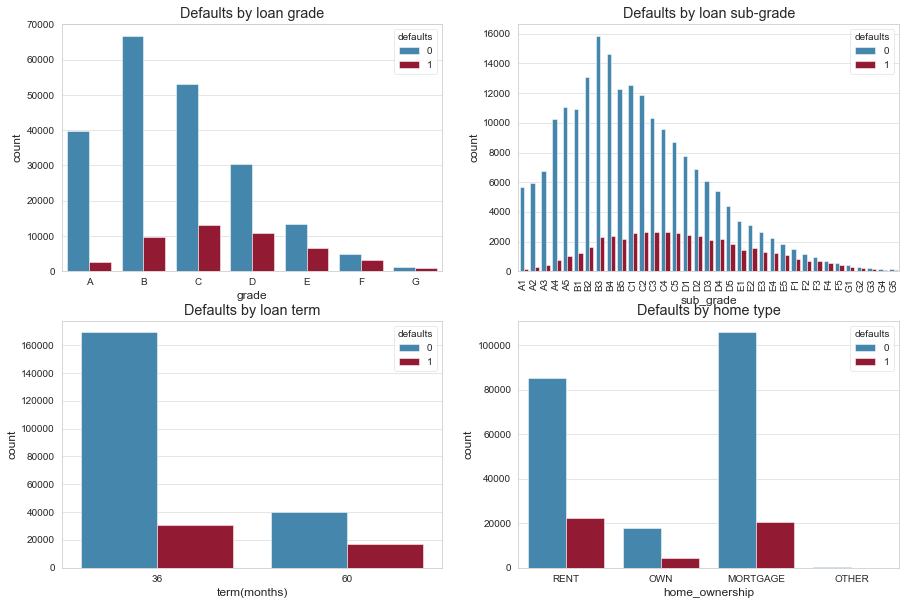

In [28]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(lc.grade.unique().tolist())
sns.countplot(x='grade', data=lc, hue='defaults', order=grade)
plt.title('Defaults by loan grade')

plt.subplot(2, 2, 2)
sub_grade = sorted(lc.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=lc, hue='defaults', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.title('Defaults by loan sub-grade')

plt.subplot(2, 2, 3)
sns.countplot(x='term(months)', data=lc, hue='defaults')
plt.title('Defaults by loan term')

plt.subplot(2, 2, 4)
sns.countplot(x='home_ownership', data=lc, hue='defaults')
plt.title('Defaults by home type')

In [29]:
print('The range of percentages for the grade column is: ', str(range_perc('grade')))
print('The range of percentages for the sub_grade column is: ', str(range_perc('sub_grade')))
print('The range of percentages for the term(months) column is: ', str(range_perc('term(months)')))
print('The range of percentages for the home_ownership column is: ', str(range_perc('home_ownership')))

The range of percentages for the grade column is:  34.82109914625252
The range of percentages for the sub_grade column is:  41.381548213719164
The range of percentages for the term(months) column is:  14.143512331688733
The range of percentages for the home_ownership column is:  4.3500820594105


Here I am going to investigate the null hypothesis that home_ownership does not correspond to defaults.

In [30]:
# create dictionary of observed values
keys1 = lc[lc['defaults']==1]['home_ownership'].value_counts(normalize=True).index.values
values1 = lc[lc['defaults']==1]['home_ownership'].value_counts(normalize=True).values
observed_dict = dict(zip(keys1, values1))

# create dictionary of expected values
keys2 = lc[lc['defaults']==0]['home_ownership'].value_counts(normalize=True).index.values
values2 = lc[lc['defaults']==0]['home_ownership'].value_counts(normalize=True).values
expected_dict = dict(zip(keys2, values2))

# create lists of expected and observed for the chisquared test
expected = []
observed = []

for key in expected_dict.keys():
    expected.append(expected_dict[key])
    observed.append(observed_dict[key])
print(expected)
print(observed)

# now the calculate the chisquare
stats.chisquare(f_obs= observed, f_exp= expected)

[0.5048696183555967, 0.4080119544356494, 0.08627817933563128, 0.0008402478731225711]
[0.4387850269193268, 0.47163932341345544, 0.0886006189325533, 0.0009750307346644623]


Power_divergenceResult(statistic=0.018656598342336198, pvalue=0.9993260338911814)

Given that the p-value is 0.99, I cannot reject the null hypothesis. In this case, I am going to drop the home_ownership column.

Also, since grade is a more general sub_grade, I am going to drop the grade column.

In [31]:
# dropping term(months) and grade columns
lc.drop(['grade', 'home_ownership'], axis=1, inplace=True)
lc.shape

(256640, 23)

### 3.6.5 dti, tot_coll_amt<a id='3.6.5_dti,_tot_coll_amt'></a>

Text(0.5, 1.0, 'Defaults by tot_coll_amt')

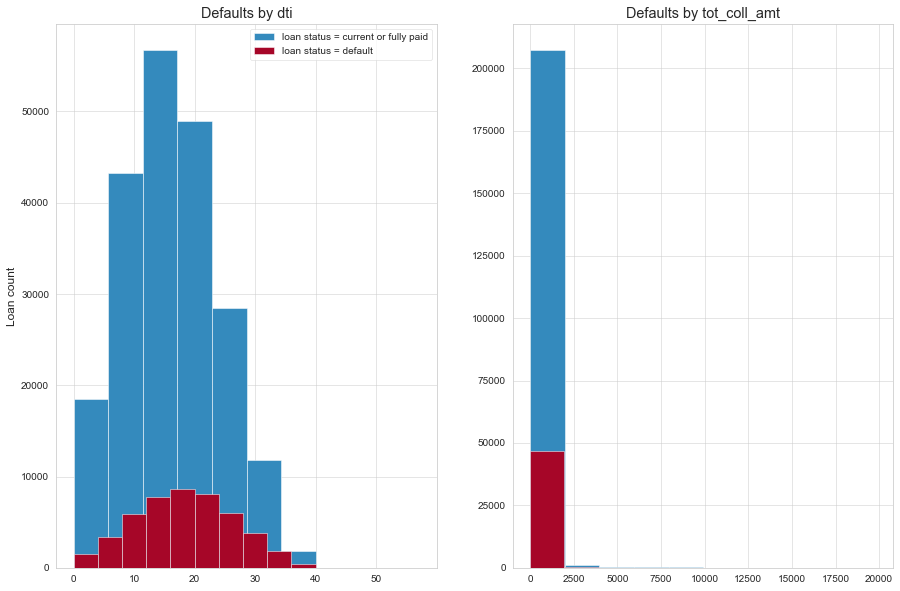

In [32]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
lc[lc['defaults'] == 0]['dti'].hist(bins=10, label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['dti'].hist(bins=10, label='loan status = default')
plt.legend()
plt.ylabel('Loan count')
plt.title('Defaults by dti')

plt.subplot(1,2,2)
tca = lc[lc.tot_coll_amt < 20000]
tca[tca["defaults"] == 0]['tot_coll_amt'].hist(label='loan status = current or fully paid')
tca[tca["defaults"] == 1]['tot_coll_amt'].hist(label='loan status = default')
plt.title('Defaults by tot_coll_amt')

Both of these columns appear to have outliers. I am going to take a closer look.

### 3.6.6 acc_now_delinq, delinq_2yrs<a id='3.6.6_acc_now_delinq,_delinq_2yrs'></a>

In [33]:
acc_now_delinq_perc = percent_defaults('acc_now_delinq')
df_acc_now_delinq = pd.DataFrame(acc_now_delinq_perc, index=['percentage'])
df_acc_now_delinq = df_acc_now_delinq.T

In [34]:
delinq_2yrs_perc = percent_defaults('delinq_2yrs')
df_delinq_2yrs = pd.DataFrame(delinq_2yrs_perc, index=['percentage']).T

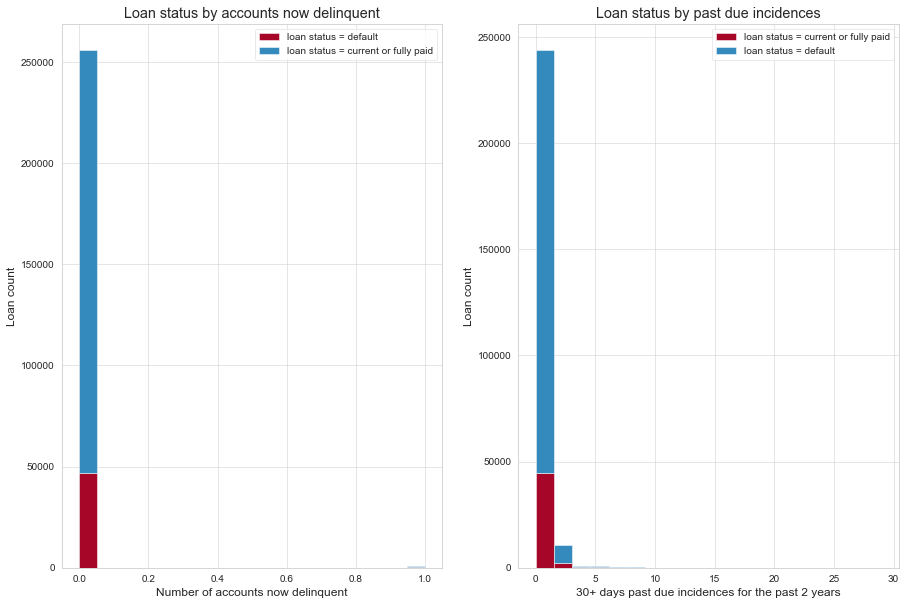

In [35]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
sns.histplot(data=lc, x='acc_now_delinq', stat='count', hue='defaults', multiple='stack', alpha=1)
plt.legend(['loan status = default', 'loan status = current or fully paid'], loc='upper right')
plt.title('Loan status by accounts now delinquent')
plt.xlabel('Number of accounts now delinquent')
plt.ylabel('Loan count')

plt.subplot(1,2,2)
sns.histplot(data=lc, x='delinq_2yrs', stat='count', hue='defaults', multiple='stack', alpha=1)
plt.title('Loan status by past due incidences')
plt.ylabel('Loan count')
plt.xlabel('30+ days past due incidences for the past 2 years')
plt.legend(['loan status = current or fully paid', 'loan status = default'], loc='upper right')

### 3.6.7 inq_last_6mths, pub_rec<a id='3.6.7_inq_last_6mths,_pub_rec'></a>

In [36]:
pub_rec_perc = percent_defaults('pub_rec')
df_pub_rec = pd.DataFrame(pub_rec_perc, index=['percentage']).T

In [37]:
inq_last_6mths_perc = percent_defaults('inq_last_6mths')
df_inq_last_6mths = pd.DataFrame(inq_last_6mths_perc, index=['percentage']).T

Text(0.5, 0, 'Loan status by derogatory public records')

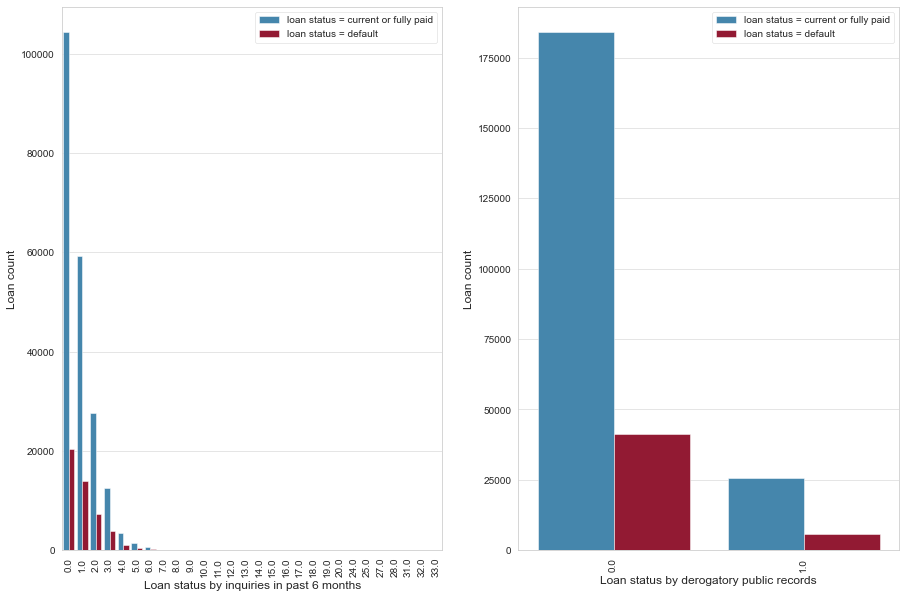

In [38]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
g = sns.countplot(x='inq_last_6mths', data=lc, hue='defaults')
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.legend(['loan status = current or fully paid', 'loan status = default'], loc='upper right')
plt.ylabel('Loan count')
plt.xlabel('Loan status by inquiries in past 6 months')

plt.subplot(1,2,2)
p = sns.countplot(x='pub_rec', data=lc, hue='defaults')
p.set_xticklabels(p.get_xticklabels(), rotation=90);
plt.legend(['loan status = current or fully paid', 'loan status = default'], loc='upper right')
plt.ylabel('Loan count')
plt.xlabel('Loan status by derogatory public records')

### 3.6.8 collections_12_mths_ex_med<a id='3.6.8_collections_12_mths_ex_med'></a>

Text(0, 0.5, 'Loan count')

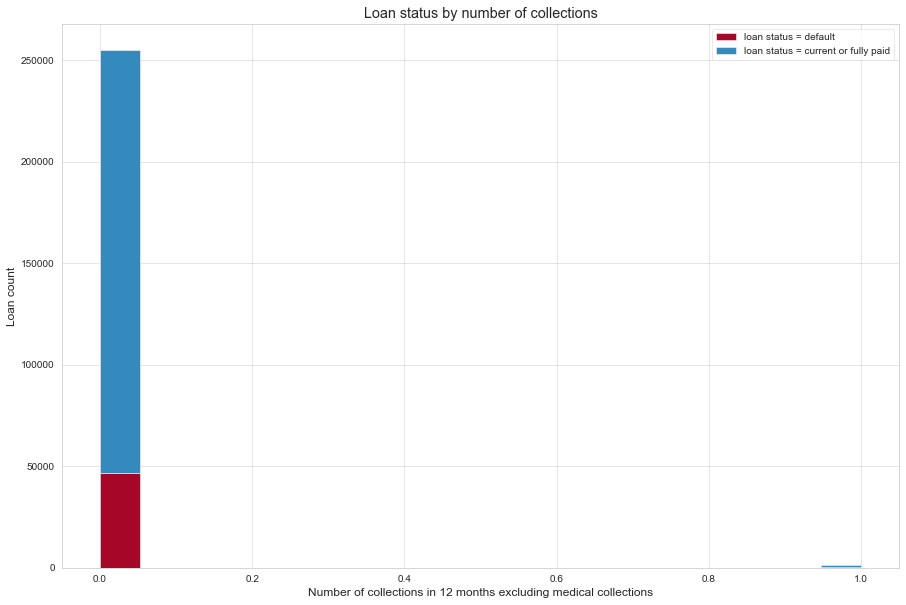

In [39]:
plt.figure(figsize=(15, 10))

sns.histplot(data=lc, x='collections_12_mths_ex_med', stat='count', hue='defaults', multiple='stack', alpha=1)
plt.legend(['loan status = default', 'loan status = current or fully paid'], loc='upper right')
plt.title('Loan status by number of collections')
plt.xlabel('Number of collections in 12 months excluding medical collections')
plt.ylabel('Loan count')

### 3.6.9 open_acc, total_acc<a id='3.6.9_open_acc,_total_acc'></a>

Text(0.5, 0, 'Number of defaults by total credit lines')

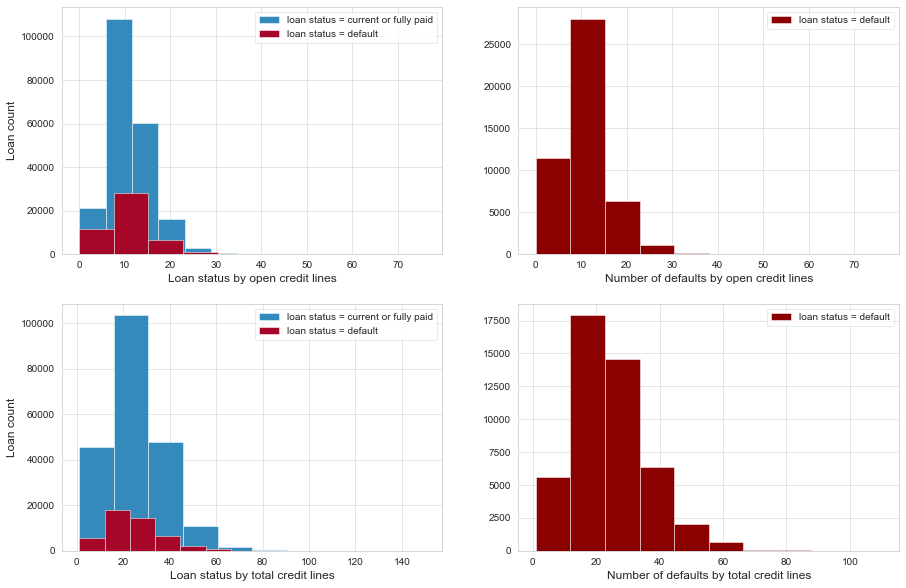

In [40]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
lc[lc["defaults"] == 0]['open_acc'].hist(label='loan status = current or fully paid')
lc[lc["defaults"] == 1]['open_acc'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Loan status by open credit lines')
plt.ylabel('Loan count')

plt.subplot(2,2,2)
lc[lc["defaults"] == 1]['open_acc'].hist(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Number of defaults by open credit lines')

plt.subplot(2,2,3)
lc[lc["defaults"] == 0]['total_acc'].hist(label='loan status = current or fully paid')
lc[lc["defaults"] == 1]['total_acc'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Loan status by total credit lines')
plt.ylabel('Loan count')

plt.subplot(2,2,4)
lc[lc["defaults"] == 1]['total_acc'].hist(label='loan status = default', color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Number of defaults by total credit lines')

### 3.6.10 log_revol_bal<a id='3.6.10_log_revol_bal'></a>

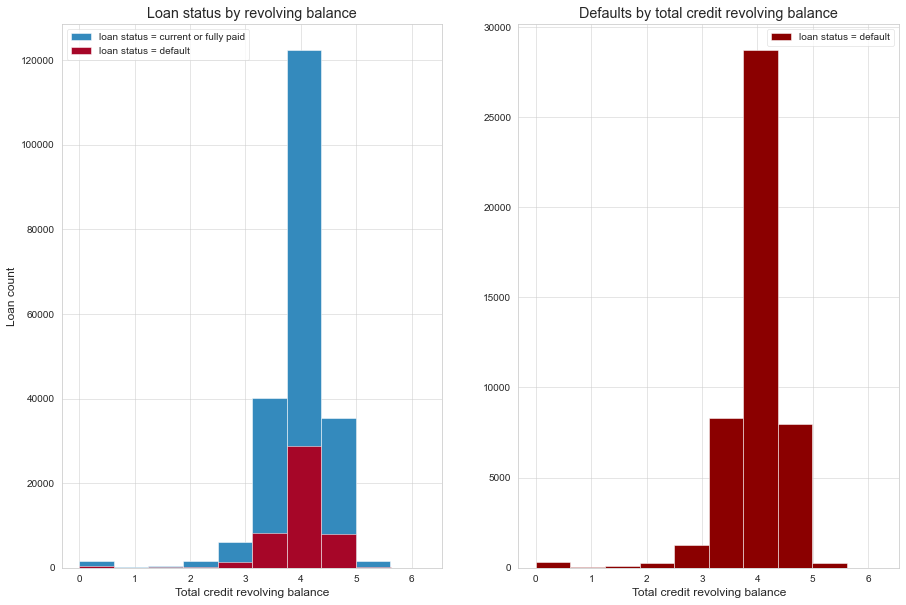

In [41]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
lc[lc['defaults'] == 0]['log_revol_bal'].hist(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['log_revol_bal'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Total credit revolving balance')
plt.ylabel('Loan count')
plt.title('Loan status by revolving balance')
plt.ticklabel_format(useOffset=False, style='plain')

plt.subplot(1,2,2)
lc[lc['defaults'] == 1]['log_revol_bal'].hist(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Total credit revolving balance')
plt.title('Defaults by total credit revolving balance')
plt.ticklabel_format(useOffset=False, style='plain')

In [42]:
lc.groupby('defaults')['log_revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
defaults,,,,,,,,
0,209462.0,3.963240,0.570425,0.0,3.760724,4.035029,4.280214,6.241364
1,47178.0,3.982433,0.544958,0.0,3.790707,4.053539,4.283793,6.242223


### 3.6.11 revol_util<a id='3.6.11_revol_util'></a>

Text(0.5, 1.0, 'Number of defaults by revolving line utilization rate')

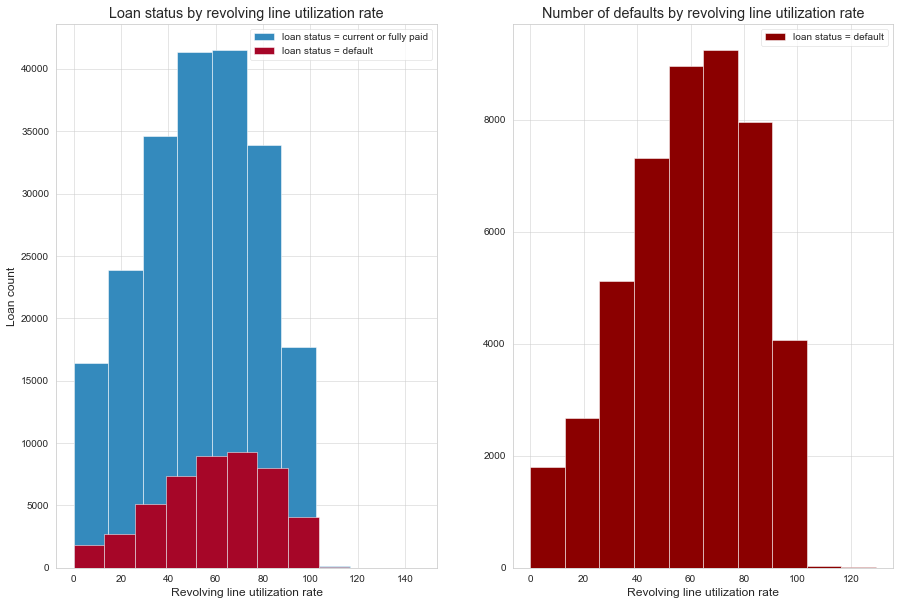

In [43]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
lc[lc['defaults'] == 0]['revol_util'].hist(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['revol_util'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Revolving line utilization rate')
plt.ylabel('Loan count')
plt.title('Loan status by revolving line utilization rate')

plt.subplot(1,2,2)
lc[lc['defaults'] == 1]['revol_util'].hist(label='loan status = default', color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Revolving line utilization rate')
plt.title('Number of defaults by revolving line utilization rate')

### 3.6.12 last_credit_pull_d, earliest_cr_line<a id='3.6.12_last_credit_pull_d,_earliest_cr_line'></a>

Text(0.5, 1.0, 'Defaults by earliest credit line')

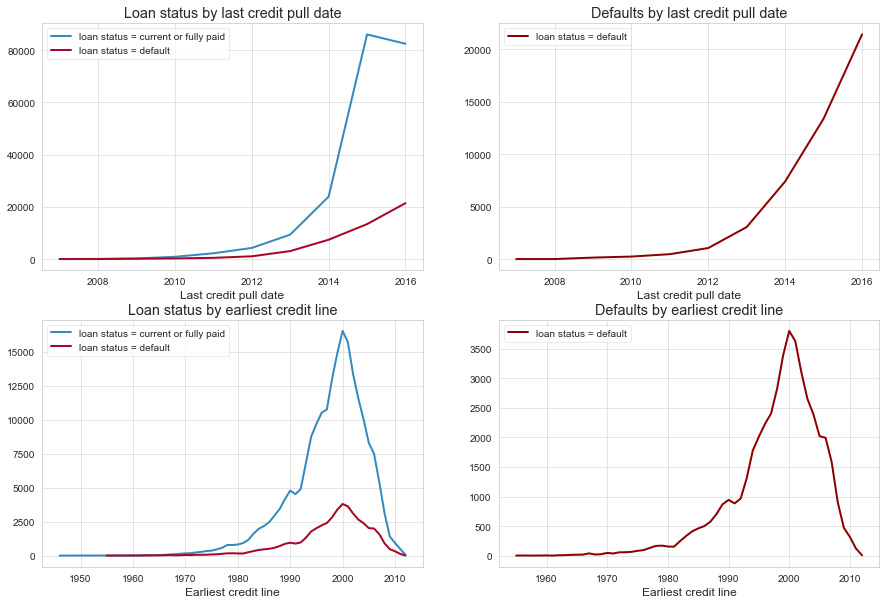

In [45]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
lc[lc['defaults'] == 0]['last_credit_pull_d_year'].value_counts().sort_index().plot(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['last_credit_pull_d_year'].value_counts().sort_index().plot(label='loan status = default')
plt.legend()
plt.xlabel('Last credit pull date')
plt.title('Loan status by last credit pull date')

plt.subplot(2,2,2)
lc[lc['defaults'] == 1]['last_credit_pull_d_year'].value_counts().sort_index().plot(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Last credit pull date')
plt.title('Defaults by last credit pull date')

plt.subplot(2,2,3)
lc[lc['defaults'] == 0]['earliest_cr_line_year'].value_counts().sort_index().plot(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['earliest_cr_line_year'].value_counts().sort_index().plot(label='loan status = default')
plt.legend()
plt.xlabel('Earliest credit line')
plt.title('Loan status by earliest credit line')

plt.subplot(2,2,4)
lc[lc['defaults'] == 1]['earliest_cr_line_year'].value_counts().sort_index().plot(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Earliest credit line')
plt.title('Defaults by earliest credit line')

### 3.6.13 sub_grade vs. int_rate<a id='3.6.13_sub_grade_vs._int_rate'></a>

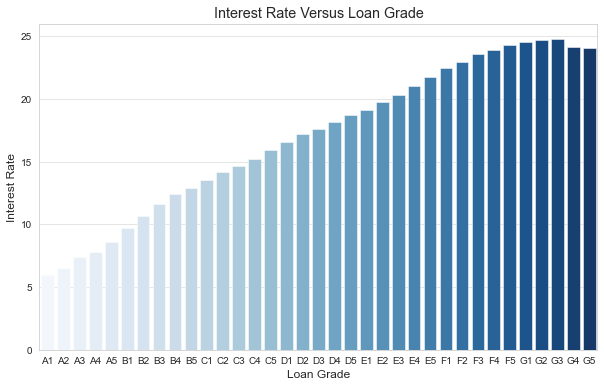

In [46]:
plt.figure(figsize=(10,6))
plot = lc.groupby('sub_grade')['int_rate'].mean()
ax = sns.barplot(x=plot.index,y=plot.values, palette='Blues')
ax = plt.xlabel('Loan Grade')
ax = plt.ylabel('Interest Rate')
ax = plt.title('Interest Rate Versus Loan Grade')

## 3.7 Summary<a id='3.7_Summary'></a>

In [47]:
lc.shape

(256640, 23)

The data set has been further explored and cleaned. It is down to 25 columns, from 31, that all appear to impact whether or not a loan will default. 

In [48]:
# save the data
lc.to_csv('../data/cleaned_data/lc_step3.csv')